# **Частотный анализ и группировка данных**

Для эффективной работы с данными крайне полезным навыком является умение нужным образом агрегировать, группировать и проводить частотный анализ данных. Сегодня мы поговорим о том, какими методами можно эффективно проводить такой анализ и какие результаты на его основе можно получить

# Упражнение на повторение

Начнем с простой задачи. Пусть у нас есть список, в котором перечислены имена героев комиксов Marvel в порядке их реплик на первых 5 минутах диалога фильма "Мстители: Война Бесконечности, часть 1"

Наша задача - отыскать самого болтливого героя.


## Решение 

Начнем с того, что посчитаем количество реплик, отведенное каждому персонажу вручную при помощи метода list.count(a).

In [ ]:
replicas = ['Эбони Мо',
            'Танос',
            'Тор',
            'Танос',
            'Локи',
            'Тор',
            'Локи',
            'Танос',
            'Локи',
            'Эбони Мо',
            'Хеймдалль',
            'Танос',
            'Тор']

Нетрудно видеть, что первые 5 минут беседа идет между 5 персонажами:
Эбони Моу, Таносом, Тором, Локи и Хеймдаллем. Как посчитать колличество реплик каждого персонажа? 

Применим к каждому из них метод count: 

In [ ]:
replicas.count('Эбони Мо')

2

In [ ]:
replicas.count('Танос')

4

In [ ]:
replicas.count('Тор')

3

In [ ]:
replicas.count('Локи')

3

In [ ]:
replicas.count('Хеймдалль')

1

Самым болтливым персонажем этого эпизода в итоге оказался Танос, имея в своем распоряжении целых 4 реплики.

# Повторение

В предыдущем примере мы применили метод `count` к типу данных `list`.

Можем ли мы применить метод `count` с другим типам данных? К каким? 

Метод `count` применим не только к типу данных `list`, но также к другим вариантам последовательностей, к которым относятся строки, листы, множества и т.д.

Например, мы можем посчитать сколько раз встречается буква `'л'` в известной скороговорке.

In [ ]:
fraze = 'Корабли лавировали-лавировали, да не вылавировали'
fraze.count('л')

7

Или даже целые слова (или просто сочетания символов)

In [ ]:
fraze.count('лав')

3

Что будет, если мы передадим в аргумент неверное значение? Скажем, элемент последовательности, которого вообще нет?

Метод `count` вернет 0

In [ ]:
fraze.count('самолет')

0

Это было очень просто, не так ли?

Давайте усложним задачу и возьмем список из 800 реплик.
Теперь анализ методом "пристального взгляда" становится нам недоступен: в таком списке фигурирует много разных уникальных персонажей, каждому из которых отведено много реплик. Даже сказать, глядя на такой список, сколько персонажей фигурирует в нем - задача затруднительная. А этот список не самый большой из тех, что могут нам встретиться!

Давайте подумаем, как мы можем автоматизировать нашу задачу. И начнем со структуры данных, которая поможет нам извлечь список уникальных персонажей из нашего листа.

In [ ]:
more_replicas = ''' Эбони Мо, Танос, Тор, Танос, Локи, Тор, Локи, Танос, Локи, Эбони Мо, Танос, Тор, Эбони Мо, Танос, Дочь Таноса, Локи, Танос, Локи, Танос, Локи, Танос, Тор, Доктор Стрэндж, Вонг, Доктор Стрэндж, Вонг, Доктор Стрэндж, Вонг, Доктор Стрэндж, Вонг, Доктор Стрэндж, Вонг, Халк, Доктор Стрэндж, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Халк, Железный Человек, Пеппер, Вонг, Доктор Стрэндж, Железный Человек, Халк, Железный Человек, Халк, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Вонг, Железный Человек, Доктор Стрэндж, Вонг, Халк, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Халк, Железный Человек, Халк, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Человек Паук, Железный Человек, Эбони Мо, Железный Человек, Эбони Мо, Доктор Стрэндж, Железный Человек, Эбони Мо, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Халк, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Халк, Железный Человек, Халк, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Эбони Мо, Доктор Стрэндж, Эбони Мо, Железный Человек, Человек Паук, Железный Человек, Халк, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Пеппер, Железный Человек, Пеппер, Железный Человек, Пеппер, Железный Человек, Человек Паук, Халк, Вонг, Халк, Питер Квилл, Ракета, Гамора, Ракета, Питер Квилл, Гамора, Питер Квилл, Дракс, Ракета, Мантис, Питер Квилл, Грут, Питер Квилл, Ракета, Мантис, Питер Квилл, Ракета, Питер Квилл, Дракс, Питер Квилл, Ракета, Дракс, Питер Квилл, Мантис, Дракс, Питер Квилл, Гамора, Питер Квилл, Мантис, Тор, Гамора, Дракс, Гамора, Тор, Дракс, Тор, Питер Квилл, Тор, Питер Квилл, Тор, Ракета, Тор, Питер Квилл, Ракета, Питер Квилл, Дракс, Питер Квилл, Мантис, Питер Квилл, Тор, Питер Квилл, Тор, Питер Квилл, Тор, Гамора, Тор, Мантис, Питер Квилл, Гамора, Тор, Питер Квилл, Гамора, Тор, Питер Квилл, Тор, Мантис, Тор, Гамора, Дракс, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Питер Квилл, Тор, Питер Квилл, Ракета, Питер Квилл, Тор, Питер Квилл, Тор, Ракета, Тор, Гамора, Тор, Ракета, Тор, Питер Квилл, Ракета, Тор, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Ванда, Вижн, Ванда, Дочь Таноса, Черная Вдова, Дочь Таноса, Сокол, Вижн, Капитан Америка, Черная Вдова, Ванда, Сокол, Капитан Америка, Гамора, Танос, Гамора, Танос, Гамора, Танос, Эбони Мо, Танос, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Дракс, Гамора, Дракс, Питер Квилл, Дракс, Мантис, Дракс, Питер Квилл, Дракс, Питер Квилл, Танос, Дракс, Танос, Дракс, Питер Квилл, Дракс, Питер Квилл, Дракс, Мантис, Питер Квилл, Танос, Питер Квилл, Танос, Гамора, Танос, Дракс, Питер Квилл, Гамора, Питер Квилл, Гамора, Питер Квилл, Танос, Питер Квилл, Гамора, Танос, Питер Квилл, Гамора, Питер Квилл, Танос, Джеймс Роудс, Джеймс Роудс, Джеймс Роудс, Джеймс Роудс, Джеймс Роудс, Капитан Америка, Черная Вдова, Капитан Америка, Джеймс Роудс, Капитан Америка, Джеймс Роудс, Сокол, Халк, Черная Вдова, Халк, Сокол, Джемс Роудс, Ванда, Халк, Черная Вдова, Халк, Капитан Америка, Халк, Черная Вдова, Вижн, Ванда, Вижн, Ванда, Вижн, Капитан Америка, Вижн, Халк, Ванда, Халк, Черная Вдова, Халк, Джеймс Роудс, Капитан Америка, Окойе, Черная Пантера, Окойе, Черная Пантера, Окойе, Черная Пантера, Баки Барнс, Черная Пантера, Эбони Мо, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Эбони Мо, Железный Человек, Эбони Мо, Железный Человек, Человек Паук, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Человек Паук, Железный Человек, Доктор Стрэндж, Человек Паук, Доктор Стрэндж, Человек Паук, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Железный Человек, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Гамора, Танос, Грут, Ракета, Грут, Тор, Ракета, Тор, Грут, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Тор, Ракета, Грут, Тор, Гном Эйтри, Тор, Гном Эйтри, Тор, Гном Эйтри, Тор, Небула, Человек Паук, Доктор Стрэндж, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Доктор Стрэндж, Железный Человек, Человек Паук, Железный Человек, Человек Паук, Дракс, Человек Паук, Питер Квилл, Дракс, Питер Квилл, Железный Человек, Дракс, Питер Квилл, Железный Человек, Дракс, Мантис, Доктор Стрэндж, Питер Квилл, Доктор Стрэндж, Питер Квилл, Железный Человек, Человек Паук, Питер Квилл, Человек Паук, Мантис, Питер Квилл, Доктор Стрэндж, Ракета, Гном Эйтри, Тор, Гном Эйтри, Ракета, Тор, Гном Эйтри, Тор, Питер Квилл, Железный Человек, Дракс, Железный Человек, Питер Квилл, Человек Паук, Мантис, Дракс, Железный Человек, Питер Квилл, Железный Человек, Питер Квилл, Дракс, Питер Квилл, Человек Паук, Питер Квилл, Железный Человек, Питер Квилл, Железный Человек, Мантис, Железный Человек, Человек Паук, Доктор Стрэндж, Питер Квилл, Доктор Стрэндж, Железный Человек, Доктор Стрэндж, Танос, Красный Череп, Танос, Красный Череп, Танос, Красный Череп, Танос, Красный Череп, Танос, Красный Череп, Гамора, Красный Череп, Танос, Красный Череп, Танос, Красный Череп, Гамора, Красный Череп, Гамора, Танос, Капитан Америка, Сокол, Окойе, Черная Пантера, Окойе, Халк, Джеймс Роудс, Капитан Америка, Черная Пантера, Халк, Черная Вдова, Черная Пантера, Баки Барнс, Капитан Америка, Шури, Халк, Шури, Халк, Шури, Ванда, Шури, Капитан Америка, Шури, Окойе, Сокол, Баки Барнс, Джеймс Роудс, Вижн, Черная Вдова, Черная Пантера, Капитан Америка, Ванда, Черная Пантера, Ракета, Тор, Ракета, Тор, Гном Эйтри, Тор, Гном Эйтри, Ракета, Гном Эйтри, Тор, Гном Эйтри, Тор, Гном Эйтри, Тор, Гном Эйтри, Тор, Черная Вдова, Халк, Джеймс Роудс, Черная Пантера, Черная Вдова, Дочь Таноса, Капитан Америка, Черная Пантера, Дочь Таноса, Баки Барнс, Капитан Америка, Баки Барнс, Черная Вдова, Окойе, Джеймс Роудс, Халк, Капитан Америка, Окойе, Черная Пантера, Окойе, Черная Пантера, Шури, Черная Пантера, Тор, Гном Эйтри, Тор, Гном Эйтри, Ракета, Гном Эйтри, Халк, Тор, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Доктор Стрэндж, Танос, Железный Человек, Питер Квилл, Доктор Стрэндж, Человек Паук, Танос, Небула, Танос, Небула, Железный Человек, Мантис, Железный Человек, Питер Квилл, Танос, Питер Квилл, Мантис, Питер Квилл, Мантис, Дракс, Небула, Питер Квилл, Небула, Железный Человек, Питер Квилл, Танос, Питер Квилл, Человек Паук, Ракета, Баки Барнс, Ракета, Капитан Америка, Тор, Капитан Америка, Тор, Грут, Капитан Америка, Черная Пантера, Джеймс Роудс, Сокол, Окойе, Дочь Таноса, Сокол, Капитан Америка, Халк, Ванда, Дочь Таноса, Черная Вдова, Халк, Капитан Америка, Черная Вдова, Капитан Америка, Вижн, Человек Паук, Танос, Железный Человек, Танос, Железный Человек, Танос, Железный Человек, Танос, Доктор Стрэндж, Танос, Железный Человек, Танос, Питер Квилл, Железный Человек, Доктор Стрэндж, Ванда, Вижн, Капитан Америка, Черная Вдова, Халк, Капитан Америка, Вижн, Ванда, Вижн, Ванда, Вижн, Ванда, Вижн, Танос, Ванда, Танос, Ванда, Тор, Танос, Гамора, Танос, Гамора, Танос, Тор, Капитан Америка, Баки Барнс, Черная Пантера, Грут, Ракета, Джеймс Роудс, Мантис, Дракс, Железный Человек, Доктор Стрэндж, Человек Паук, Железный Человек, Человек Паук, Небула,
 Джеймс Роудс, Капитан Америка'''
more_replicas = more_replicas.replace('Джемс Роудс','Джеймс Роудс')
more_replicas = more_replicas.split(',')

In [ ]:
len(more_replicas)

808

# Повторение **"Тип данных set (множество)"**

Множества в Python – это структура данных, которые содержат неупорядоченные элементы. Элемент также не является индексированным. Как и список, множество позволяет производить внесение и удаление элементов. Однако, есть ряд особенных характеристик, которые определяют и отделяют множество от других структур данных:


*   Множество не содержит дубликаты элементов;
*   Элементы множества являются неизменными (их нельзя менять), однако само по себе множество является изменяемым, и его можно менять;
*   Так как элементы не индексируются, множества не поддерживают никаких операций среза и индексирования.



Каким образом можно создавать множества?

Путем перечисления элементов в фигурных скобках:

In [ ]:
my_set = {1,2,3,4,5,6}
my_set

{1, 2, 3, 4, 5, 6}

Можно создать множество из списка путем применения встроенной функции `set`:

In [ ]:
my_list = [1,2,3,4,3,2,1]
my_set = set(my_list)
my_set

{1, 2, 3, 4}

*Подумайте, из каких еще типов данных можно получить множество при использовании функции `set`.*

**Заметим**, что размер множества не совпадает с размером списка. Это получается в силу свойства 1, постулирующего уникальность каждого элемента внутри `set`. Таким образом `set` содержит все **уникальные** элементы нашего списка.

Как вы думаете, что произойдет, если обратиться к элементу множества по индексу?

In [ ]:
my_set[0]

TypeError: ignored

Множество также можно превратить в индексируемый список путем применения `list()`. Но и доступ к элементам самого множества нам, конечно, не закрыт. Множество - **итеррируемый** объект, то есть к его элементам можно обращаться внутри цикла `for`.

In [ ]:
for num in my_set:
  print(num)

1
2
3
4


Каким образом мы можем проверить принадлежность некоторого элемента множеству?

Нам также доступна проверка принадлежности элемента множеству при помощи функции `in`:

In [ ]:
print(' !No Pasaran! in my_set: ', '!No Pasaran!' in my_set)
print(' 4 in my_set: ', 4 in my_set)

 !No Pasaran! in my_set:  False
 4 in my_set:  True


# Повторение - методы множеств

Вспомним основные методы и функция для работы со множествами. 

Добавление элемента в множество производится при помощи функции `add`,а удаление - при помощи метода `remove` или `discard`.

In [ ]:
my_set.add('!No Pasaran!')
my_set.remove(4)

print(' !No Pasaran! in my_set: ', '!No Pasaran!' in my_set)
print(' 4 in my_set: ', 4 in my_set)

 !No Pasaran! in my_set:  True
 4 in my_set:  False


В чем отличие `remove` и `discard`?

Отличие состоит в том, что при попытке удаления элемента, не принадлежащего множеству, `remove` выдаст ошибку, а `discard` проигнорирует. Проверьте самостоятельно. 

Мы можем объединять множества при помощи функции слияния `set.union()`

In [ ]:
a = {1,3,5,7,9}
b = {2,4,6,8,10}

print(a.union(b))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


Для определения пересечения множеств используется метод set.intersection()
А для определения разницы - set.difference(). Для определения симметрической разницы есть функция set.symmetric_difference()

In [ ]:
a = {1,2,3,4}
b = {3,4,5,6}

print('Intersection: ', a.intersection(b))
print('Difference: ', a.difference(b))
print('Symmetric Difference: ', a.symmetric_difference(b))

Intersection:  {3, 4}
Difference:  {1, 2}
Symmetric Difference:  {1, 2, 5, 6}


К множествам также применима встроенная функция len, возвращающая мощность множества

In [ ]:
len(my_set)

4

## Применяем тип данных `set` для анализа нашей задачи

In [ ]:
character_set = set(more_replicas)
character_set

{' Баки Барнс',
 ' Ванда',
 ' Вижн',
 ' Вонг',
 ' Гамора',
 ' Гном Эйтри',
 ' Грут',
 ' Джеймс Роудс',
 ' Доктор Стрэндж',
 ' Дочь Таноса',
 ' Дракс',
 ' Железный Человек',
 ' Капитан Америка',
 ' Красный Череп',
 ' Локи',
 ' Мантис',
 ' Небула',
 ' Окойе',
 ' Пеппер',
 ' Питер Квилл',
 ' Ракета',
 ' Сокол',
 ' Танос',
 ' Тор',
 ' Халк',
 ' Человек Паук',
 ' Черная Вдова',
 ' Черная Пантера',
 ' Шури',
 ' Эбони Мо'}

Что ж, персонажей явно стало больше. 

Давайте посчитаем, сколько персонажей есть сейчас, и определим, кто добавился по сравнению с первым диалогом.

Какие  функции и методы нам пригодятся?

In [ ]:
print('Количество персонажей в первых 800 репликах: ', len(character_set))
print('Новые персонажи: ', character_set.difference(set(replicas)))

Количество персонажей в первых 800 репликах:  30
Новые персонажи:  {' Сокол', ' Мантис', ' Небула', ' Дочь Таноса', ' Вонг', ' Джеймс Роудс', ' Вижн', ' Гном Эйтри', ' Капитан Америка', ' Шури', ' Красный Череп', ' Питер Квилл', ' Гамора', ' Пеппер', ' Дракс', ' Ракета', ' Человек Паук', ' Черная Вдова', ' Черная Пантера', ' Окойе', ' Баки Барнс', ' Железный Человек', ' Халк', ' Доктор Стрэндж', ' Грут', ' Ванда'}


Попробуем теперь посчитать для каждого персонажа количество реплик, отведенное ему. Мы бы хотели иметь удобную структуру данных, чтобы сопоставить каждому персонажу целое число, равное количеству его реплик. Однако, как это сделать?

Если мы заведем соответствующий список, то проиндексировать его именами персонажей мы не сможем - индексом списка служит лишь целое число. Мы можем "пронумеровать" персонажей и завести массив, где каждому индексу будет отвечать определенный персонаж, а в ячейке под этим индексом будет записано количество реплик этого персонажа. Однако, это неудобно и громоздко. Может быть, есть способ проще? Какую структуру данных вы бы использовали?

# Повторение - **Структура данных dict (словари)**
*Словари в Python* - **неупорядоченные** коллекции произвольных объектов с доступом по ключу. Ключом может служить произвольный объект - число, строка, даже список или более сложный тип данных.

Как создавать словари?




**1 способ**: инициализация при помощи {}

Перечисляются ключи и соответствующие им элементы в парах. Ключ и элемент внутри пары разделяются при помощи :, а пары - при помощи запятой

In [ ]:
my_dict = {'Дом' : 3, 'Пруд' : 4, 'Трава' : 5, 'Собака' : 6}
my_dict

{'Дом': 3, 'Пруд': 4, 'Собака': 6, 'Трава': 5}

**2 способ**: при помощи функции `dict()`

В аргумент функции передаются пары ключ=значение

In [ ]:
my_dict = dict(Дом=3, Пруд=4, Трава=5, Собака=6)
my_dict

{'Дом': 3, 'Пруд': 4, 'Собака': 6, 'Трава': 5}

Обращение к элементу словаря происходит по ключу: 



In [ ]:
my_dict['Дом']

3

Словарь можно разделить на множество **ключей** и множество **значений**. Доступ к ним происходит при помощи `dict.keys()` и `dict.values()` соответственно. Возвращаемые этими функциями объекты - итеррируемые, но не индексируемые. Привести их к виду обычного списка можно при помощи функции `list() `

In [ ]:
for key in my_dict.keys():
  print(key)

Дом
Пруд
Трава
Собака


In [ ]:
for value in my_dict.values():
  print(value)

3
4
5
6


In [ ]:
list(my_dict.keys())[0]

'Дом'

Но если попробовать обратиться к .keys() по индексу:

In [ ]:
my_dict.keys()[0]

TypeError: ignored

Также можно возвращать пары значение-ключ при помощи метода `dict.items()`

In [ ]:
for pair in my_dict.items():
  print(pair)

('Дом', 3)
('Пруд', 4)
('Трава', 5)
('Собака', 6)


**Добавление** новой пары ключ-значение в словарь можно производить просто при помощи присвоения соответствующего значения нужному ключу

In [ ]:
my_dict['Пятерка'] = 7
my_dict

{'Дом': 3, 'Пруд': 4, 'Пятерка': 7, 'Собака': 6, 'Трава': 5}

**Удаление** элемента из словаря производится при помощи функции dict.pop(key). Функция возвращает значение удаленного ключа.

In [ ]:
print(my_dict.pop('Дом'))
my_dict

3


{'Пруд': 4, 'Пятерка': 7, 'Собака': 6, 'Трава': 5}

# **Генерация множеств и словарей**

Отдельный интерес представляет собой процесс генерации множеств и словарей. Это аналогия с генерацией списков, которая уже встречалась в нашем курсе.

Допустим, мы хотим сформировать множество всех четных чисел от 0 и до 101. Задавать руками такое множество - долгий и ненужный процесс. Воспользуемся генератором множеств

In [ ]:
S = {i for i in range(0,101,2)}
print('Type of S: ', type(S))
print('S = ', S)

Type of S:  <class 'set'>
S =  {0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100}


Генераторы могут быть намного более хитрыми. Рассмотрим пример.

# Задача
Пусть, скажем, мы хотим задать последовательность биномиальных коэффициентов с n = 10 при k от 1 до 10. 

Биномиальный коэффициент ${C^k}_n$ - это число способов выбрать k объектов из n. Существует формула для вычисления биномиального коэффициента: 

${{C^k}_n = \frac{n!}{k!(n-k)!}}$, где h! = 1* 2 * 3 * 4 * ...* h - факториал h. 

Например, пусть мы имеем 4 пронумерованных шара, спросим себя: сколько существует способов выбрать 2 из этих 4? Посчитаем руками: можно выбрать следующие пары (1,2); (1,3); (1,4); (2,3); (2,4); (3,4) - всего 6 штук. В свою очередь ${{C^2}_4} = \frac{4!}{2!2!} = \frac{1 * 2 * 3 * 4}{2 * 2} = 6$

In [ ]:
def fact(n):
  res = 1
  for i in range(1,n):
    res*=i
  return res
binomial_coef = lambda x: int(fact(10)/(fact(x) * fact(10 - x)))

binomial_coef_set = {binomial_coef(i) for i in range(11)}
binomial_coef_set

{1, 9, 72, 252, 504, 630}

Можно заметить, что наше множество состоит всего из 6 элементов. Это связано с тем, что для некоторых значений k ${C^k}_n$ совпадают. Несложно проверить, например, что ${C^4}_{10}$ и ${C^6}_{10}$ - равны.

Аналогично генерируются и словари, только вместо одного элемента мы передаем пару **ключ:значение** внутри генератора

Зададим словарь, ключами которого будут значения k, а значениями - ${C^k}_{10}$

In [ ]:
binomial_coef_dict = {k:binomial_coef(k) for k in range(11)}
print(binomial_coef_dict)

{0: 1, 1: 9, 2: 72, 3: 252, 4: 504, 5: 630, 6: 504, 7: 252, 8: 72, 9: 9, 10: 1}


**Применим теперь наше умение обращаться со словарями, чтобы немного лучше понять задачу с репликами героев**

Итак, мы знаем, что для того, чтобы посчитать количество реплик героя `hero`, мы должны вызвать функцию **more_replicas.count(hero)** ; также мы умеем генерировать множества и словари. Воспользуемся этим: 

In [ ]:
how_much_do_heroes_talks = {} # пустой словарь для пар (герой, реплика)

heroes = set(more_replicas) #зададим множество героев

for hero in heroes:
  how_much_do_heroes_talks[hero] = more_replicas.count(hero)

how_much_do_heroes_talks

{' Баки Барнс': 7,
 ' Ванда': 29,
 ' Вижн': 25,
 ' Вонг': 9,
 ' Гамора': 45,
 ' Гном Эйтри': 15,
 ' Грут': 7,
 ' Джеймс Роудс': 16,
 ' Доктор Стрэндж': 55,
 ' Дочь Таноса': 7,
 ' Дракс': 27,
 ' Железный Человек': 101,
 ' Капитан Америка': 26,
 ' Красный Череп': 9,
 ' Локи': 6,
 ' Мантис': 17,
 ' Небула': 6,
 ' Окойе': 10,
 ' Пеппер': 15,
 ' Питер Квилл': 72,
 ' Ракета': 41,
 ' Сокол': 8,
 ' Танос': 65,
 ' Тор': 66,
 ' Халк': 38,
 ' Человек Паук': 37,
 ' Черная Вдова': 15,
 ' Черная Пантера': 16,
 ' Шури': 6,
 ' Эбони Мо': 12}

То же самое можно было сделать с помощью генератора словарей:

In [ ]:
##Зададим множество героев
heroes = set(more_replicas)

##Воспользуемся генератором словарей для задания нужного нам словаря
how_much_do_heroes_talks = {hero: more_replicas.count(hero) for hero in heroes}

how_much_do_heroes_talks

{' Баки Барнс': 7,
 ' Ванда': 29,
 ' Вижн': 25,
 ' Вонг': 9,
 ' Гамора': 45,
 ' Гном Эйтри': 15,
 ' Грут': 7,
 ' Джеймс Роудс': 15,
 ' Джемс Роудс': 1,
 ' Доктор Стрэндж': 55,
 ' Дочь Таноса': 7,
 ' Дракс': 27,
 ' Железный Человек': 101,
 ' Капитан Америка': 26,
 ' Красный Череп': 9,
 ' Локи': 6,
 ' Мантис': 17,
 ' Небула': 6,
 ' Окойе': 10,
 ' Пеппер': 15,
 ' Питер Квилл': 72,
 ' Ракета': 41,
 ' Сокол': 8,
 ' Танос': 65,
 ' Тор': 66,
 ' Халк': 38,
 ' Человек Паук': 37,
 ' Черная Вдова': 15,
 ' Черная Пантера': 16,
 ' Шури': 6,
 ' Эбони Мо': 12}

Давайте напишем более оптимальный вариант программы (с точки зрения скорости выполнения):

In [ ]:
how_much_do_heroes_talks = {} # пустой словарь для пар (герой, реплика)

for replica in more_replicas:
  if replica not in how_much_do_heroes_talks:
    how_much_do_heroes_talks[replica] = 1
  else:
    how_much_do_heroes_talks[replica] += 1

how_much_do_heroes_talks

{' Баки Барнс': 7,
 ' Ванда': 29,
 ' Вижн': 25,
 ' Вонг': 9,
 ' Гамора': 45,
 ' Гном Эйтри': 15,
 ' Грут': 7,
 ' Джеймс Роудс': 16,
 ' Доктор Стрэндж': 55,
 ' Дочь Таноса': 7,
 ' Дракс': 27,
 ' Железный Человек': 101,
 ' Капитан Америка': 26,
 ' Красный Череп': 9,
 ' Локи': 6,
 ' Мантис': 17,
 ' Небула': 6,
 ' Окойе': 10,
 ' Пеппер': 15,
 ' Питер Квилл': 72,
 ' Ракета': 41,
 ' Сокол': 8,
 ' Танос': 65,
 ' Тор': 66,
 ' Халк': 38,
 ' Человек Паук': 37,
 ' Черная Вдова': 15,
 ' Черная Пантера': 16,
 ' Шури': 6,
 ' Эбони Мо': 12}

Упорядочим словарь по значениям:

In [ ]:
rating = sorted(how_much_do_heroes_talks.items(), key=lambda pair: pair[1], reverse=True)
rating

[(' Железный Человек', 101),
 (' Питер Квилл', 72),
 (' Тор', 66),
 (' Танос', 65),
 (' Доктор Стрэндж', 55),
 (' Гамора', 45),
 (' Ракета', 41),
 (' Халк', 38),
 (' Человек Паук', 37),
 (' Ванда', 29),
 (' Дракс', 27),
 (' Капитан Америка', 26),
 (' Вижн', 25),
 (' Мантис', 17),
 (' Джеймс Роудс', 16),
 (' Черная Пантера', 16),
 (' Пеппер', 15),
 (' Черная Вдова', 15),
 (' Гном Эйтри', 15),
 (' Эбони Мо', 12),
 (' Окойе', 10),
 (' Вонг', 9),
 (' Красный Череп', 9),
 (' Сокол', 8),
 (' Дочь Таноса', 7),
 (' Грут', 7),
 (' Баки Барнс', 7),
 (' Локи', 6),
 (' Небула', 6),
 (' Шури', 6)]

Воспользуемся классом `Counter` из стандартной библиотеки ` collections`:

In [ ]:
from collections import Counter

how_much_do_heroes_talks = Counter()

for replica in more_replicas:
  how_much_do_heroes_talks[replica] += 1

how_much_do_heroes_talks

Counter({' Баки Барнс': 7,
         ' Ванда': 29,
         ' Вижн': 25,
         ' Вонг': 9,
         ' Гамора': 45,
         ' Гном Эйтри': 15,
         ' Грут': 7,
         ' Джеймс Роудс': 16,
         ' Доктор Стрэндж': 55,
         ' Дочь Таноса': 7,
         ' Дракс': 27,
         ' Железный Человек': 101,
         ' Капитан Америка': 26,
         ' Красный Череп': 9,
         ' Локи': 6,
         ' Мантис': 17,
         ' Небула': 6,
         ' Окойе': 10,
         ' Пеппер': 15,
         ' Питер Квилл': 72,
         ' Ракета': 41,
         ' Сокол': 8,
         ' Танос': 65,
         ' Тор': 66,
         ' Халк': 38,
         ' Человек Паук': 37,
         ' Черная Вдова': 15,
         ' Черная Пантера': 16,
         ' Шури': 6,
         ' Эбони Мо': 12})

In [ ]:
from collections import Counter

how_much_do_heroes_talks = Counter(replica for replica in more_replicas)

how_much_do_heroes_talks

Counter({' Баки Барнс': 7,
         ' Ванда': 29,
         ' Вижн': 25,
         ' Вонг': 9,
         ' Гамора': 45,
         ' Гном Эйтри': 15,
         ' Грут': 7,
         ' Джеймс Роудс': 16,
         ' Доктор Стрэндж': 55,
         ' Дочь Таноса': 7,
         ' Дракс': 27,
         ' Железный Человек': 101,
         ' Капитан Америка': 26,
         ' Красный Череп': 9,
         ' Локи': 6,
         ' Мантис': 17,
         ' Небула': 6,
         ' Окойе': 10,
         ' Пеппер': 15,
         ' Питер Квилл': 72,
         ' Ракета': 41,
         ' Сокол': 8,
         ' Танос': 65,
         ' Тор': 66,
         ' Халк': 38,
         ' Человек Паук': 37,
         ' Черная Вдова': 15,
         ' Черная Пантера': 16,
         ' Шури': 6,
         ' Эбони Мо': 12})

In [ ]:
rating = how_much_do_heroes_talks.most_common()
rating

[(' Железный Человек', 101),
 (' Питер Квилл', 72),
 (' Тор', 66),
 (' Танос', 65),
 (' Доктор Стрэндж', 55),
 (' Гамора', 45),
 (' Ракета', 41),
 (' Халк', 38),
 (' Человек Паук', 37),
 (' Ванда', 29),
 (' Дракс', 27),
 (' Капитан Америка', 26),
 (' Вижн', 25),
 (' Мантис', 17),
 (' Джеймс Роудс', 16),
 (' Черная Пантера', 16),
 (' Пеппер', 15),
 (' Черная Вдова', 15),
 (' Гном Эйтри', 15),
 (' Эбони Мо', 12),
 (' Окойе', 10),
 (' Вонг', 9),
 (' Красный Череп', 9),
 (' Сокол', 8),
 (' Дочь Таноса', 7),
 (' Грут', 7),
 (' Баки Барнс', 7),
 (' Локи', 6),
 (' Небула', 6),
 (' Шури', 6)]

# **Задачи**



Дан текст на английском языке. Нужно вывести все слова, встречающиеся в тексте, в порядке увеличения их встречаемости в тексте.

Текстом для нас послужит стихотворение Эдгара Алана По "The Raven".


In [ ]:
text = '''
Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore,
While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping, rapping at my chamber door.
«‘Tis some visiter,» I muttered, «tapping at my chamber door—
Only this, and nothing more.»

Ah, distinctly I remember it was in the bleak December,
And each separate dying ember wrought its ghost upon the floor.
Eagerly I wished the morrow;—vainly I had sought to borrow
From my books surcease of sorrow—sorrow for the lost Lenore—
For the rare and radiant maiden whom the angels name Lenore—
Nameless here for evermore.

And the silken sad uncertain rustling of each purple curtain
Thrilled me—filled me with fantastic terrors never felt before;
So that now, to still the beating of my heart, I stood repeating
«‘Tis some visiter entreating entrance at my chamber door—
Some late visiter entreating entrance at my chamber door;—
This it is, and nothing more.»

Presently my soul grew stronger; hesitating then no longer,
«Sir,» said I, «or Madam, truly your forgiveness I implore;
But the fact is I was napping, and so gently you came rapping,
And so faintly you came tapping, tapping at my chamber door,
That I scarce was sure I heard you»—here I opened wide the door;——
Darkness there, and nothing more.

Deep into that darkness peering, long I stood there wondering, fearing,
Doubting, dreaming dreams no mortal ever dared to dream before;
But the silence was unbroken, and the darkness gave no token,
And the only word there spoken was the whispered word, «Lenore!»
This I whispered, and an echo murmured back the word, «Lenore!»
Merely this, and nothing more.

Back into the chamber turning, all my soul within me burning,
Soon I heard again a tapping somewhat louder than before.
«Surely,» said I, «surely that is something at my window lattice;
Let me see, then, what thereat is, and this mystery explore—
Let my heart be still a moment and this mystery explore;—
‘Tis the wind and nothing more!»

Open here I flung the shutter, when, with many a flirt and flutter,
In there stepped a stately raven of the saintly days of yore;
Not the least obeisance made he; not an instant stopped or stayed he;
But, with mien of lord or lady, perched above my chamber door—
Perched upon a bust of Pallas just above my chamber door—
Perched, and sat, and nothing more.

Then this ebony bird beguiling my sad fancy into smiling,
By the grave and stern decorum of the countenance it wore,
«Though thy crest be shorn and shaven, thou,» I said, «art sure no craven,
Ghastly grim and ancient raven wandering from the Nightly shore—
Tell me what thy lordly name is on the Night’s Plutonian shore!»
Quoth the raven, «Nevermore.»

Much I marvelled this ungainly fowl to hear discourse so plainly,
Though its answer little meaning—little relevancy bore;
For we cannot help agreeing that no living human being
Ever yet was blessed with seeing bird above his chamber door—
Bird or beast upon the sculptured bust above his chamber door,
With such name as «Nevermore.»

But the raven, sitting lonely on the placid bust, spoke only
That one word, as if his soul in that one word he did outpour.
Nothing farther then he uttered—not a feather then he fluttered—
Till I scarcely more than muttered «Other friends have flown before—
On the morrow he will leave me, as my hopes have flown before.»
Then the bird said «Nevermore.»

Startled at the stillness broken by reply so aptly spoken,
«Doubtless,» said I, «what it utters is its only stock and store
Caught from some unhappy master whom unmerciful Disaster
Followed fast and followed faster till his songs one burden bore—
Till the dirges of his Hope that melancholy burden bore
Of ‘Never—nevermore.'»

But the raven still beguiling all my sad soul into smiling,
Straight I wheeled a cushioned seat in front of bird, and bust and door;
Then, upon the velvet sinking, I betook myself to linking
Fancy unto fancy, thinking what this ominous bird of yore—
What this grim, ungainly, ghastly, gaunt, and ominous bird of yore
Meant in croaking «Nevermore.»

This I sat engaged in guessing, but no syllable expressing
To the fowl whose fiery eyes now burned into my bosom’s core;
This and more I sat divining, with my head at ease reclining
On the cushion’s velvet lining that the lamplight gloated o’er,
But whose velvet violet lining with the lamplight gloating o’er,
She shall press, ah, nevermore!

Then, methought, the air grew denser, perfumed from an unseen censer
Swung by angels whose faint foot-falls tinkled on the tufted floor.
«Wretch,» I cried, «thy God hath lent thee—by these angels he hath sent thee
Respite—respite and nepenthe from thy memories of Lenore!
Quaff, oh quaff this kind nepenthe and forget this lost Lenore!»
Quoth the raven, «Nevermore.»

«Prophet!» said I, «thing of evil!—prophet still, if bird or devil!—
Whether Tempter sent, or whether tempest tossed thee here ashore,
Desolate yet all undaunted, on this desert land enchanted—
On this home by Horror haunted—tell me truly, I implore—
Is there—is there balm in Gilead?—tell me—tell me, I implore!»
Quoth the raven, «Nevermore.»

«Prophet!» said I, «thing of evil—prophet still, if bird or devil!
By that Heaven that bends above us—by that God we both adore—
Tell this soul with sorrow laden if, within the distant Aidenn,
It shall clasp a sainted maiden whom the angels name Lenore—
Clasp a rare and radiant maiden whom the angels name Lenore.»
Quoth the raven, «Nevermore.»

«Be that word our sign of parting, bird or fiend!» I shrieked, upstarting—
«Get thee back into the tempest and the Night’s Plutonian shore!
Leave no black plume as a token of that lie thy soul hath spoken!
Leave my loneliness unbroken!—quit the bust above my door!
Take thy beak from out my heart, and take thy form from off my door!»
Quoth the raven, «Nevermore.»

And the raven, never flitting, still is sitting, still is sitting
On the pallid bust of Pallas just above my chamber door;
And his eyes have all the seeming of a demon’s that is dreaming,
And the lamp-light o’er him streaming throws his shadow on the floor;
And my soul from out that shadow that lies floating on the floor
Shall be lifted—nevermore!
'''

# Решение

In [ ]:
#сначала заменяем часть знаков препинания и переносы строк (\n) на пробелы,
#удаляем необходимые знаки препинания с помощью замены на пустое слово
#приводим все слова к нижнему регистру 
text = text.replace('\n',' ').replace('«','').replace('»','').replace('.',' ').replace(';','').replace('-','').replace('—',' ').replace('!',' ').replace(',',' ').replace('  ',' ').replace('   ',' ').lower()
#разделяем преобразованный текст по пробелам, получаем список из слов
text_splitted = text.split(' ')
#удаляем пустые слова из нашего списка
while '' in text_splitted:
  text_splitted.remove('')
len(text_splitted)

1089

In [ ]:
from collections import Counter

frequency_dictionary = Counter(word for word in text_splitted)

frequency_dictionary

Counter({"'": 1,
         'a': 14,
         'above': 7,
         'adore': 1,
         'again': 1,
         'agreeing': 1,
         'ah': 2,
         'aidenn': 1,
         'air': 1,
         'all': 4,
         'an': 3,
         'ancient': 1,
         'and': 38,
         'angels': 5,
         'answer': 1,
         'aptly': 1,
         'art': 1,
         'as': 5,
         'ashore': 1,
         'at': 8,
         'back': 3,
         'balm': 1,
         'be': 4,
         'beak': 1,
         'beast': 1,
         'beating': 1,
         'before': 5,
         'beguiling': 2,
         'being': 1,
         'bends': 1,
         'betook': 1,
         'bird': 10,
         'black': 1,
         'bleak': 1,
         'blessed': 1,
         'books': 1,
         'bore': 3,
         'borrow': 1,
         'bosom’s': 1,
         'both': 1,
         'broken': 1,
         'burden': 2,
         'burned': 1,
         'burning': 1,
         'bust': 6,
         'but': 7,
         'by': 7,
         'came': 3,
      

In [ ]:
ordered_list_of_words = []
for word in frequency_dictionary.most_common():
  ordered_list_of_words.append(word[0])

ordered_list_of_words

['the',
 'and',
 'i',
 'my',
 'of',
 'this',
 'that',
 'a',
 'door',
 'chamber',
 'is',
 'nevermore',
 'raven',
 'bird',
 'on',
 'me',
 'at',
 'more',
 'from',
 'lenore',
 'with',
 'then',
 'or',
 'there',
 'nothing',
 'in',
 'still',
 'soul',
 'no',
 'said',
 'but',
 'he',
 'above',
 'by',
 'thy',
 'his',
 'was',
 'to',
 'into',
 'word',
 'bust',
 'upon',
 'tapping',
 'as',
 'some',
 'it',
 'angels',
 'name',
 'before',
 'so',
 'what',
 'tell',
 'quoth',
 'one',
 'only',
 'floor',
 'for',
 'whom',
 'here',
 'all',
 'be',
 'if',
 'thee',
 'prophet',
 'came',
 'rapping',
 '‘tis',
 'visiter',
 'its',
 'sorrow',
 'maiden',
 'sad',
 'heart',
 'implore',
 'you',
 'darkness',
 'spoken',
 'an',
 'back',
 'yore',
 'not',
 'perched',
 'sat',
 'fancy',
 'shore',
 'bore',
 'sitting',
 'till',
 'have',
 'leave',
 'velvet',
 'whose',
 'lamplight',
 'o’er',
 'shall',
 'hath',
 'while',
 'many',
 'napping',
 'gently',
 'muttered',
 'ah',
 'each',
 'morrow',
 'lost',
 'rare',
 'radiant',
 'never',
 'n

In [ ]:
len(ordered_list_of_words)

437

Заметим, что выполненный нами анализ не вполне корректен. Многие из слов встречаюся фактически несколько раз, отличаясь лишь своей формой - разными склонениями, числом или родом. К примеру, в нашем словаре есть слова "him" и "his", которые нам хотелось бы расценивать как одно и то же слово. Существуют методы приведения слов в текстах к словарной форме, очень часто используемые в обработке естественного языка. Такой процесс называется лемматизацией. Воспользуемся им, не углублясь в суть этих методов, и посмотрим внимательнее на результат.

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

text_splitted_lemmatized = [lemmatizer.lemmatize(word) for word in text_splitted]
vocabulary_lemmatized = set(text_splitted_lemmatized)
len(vocabulary_lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


432

Длина словаря ожидаемо уменьшилась. Это связано с тем, что некоторые слова, приведенные к словарной форме, оказались одинаковыми

In [ ]:
from collections import Counter

frequency_dictionary_lemmatized = Counter(word for word in text_splitted_lemmatized)



In [ ]:
ordered_list_of_words_lemmatized = []
for word in frequency_dictionary_lemmatized.most_common():
  ordered_list_of_words_lemmatized.append(word[0])

ordered_list_of_words_lemmatized

['the',
 'and',
 'i',
 'my',
 'of',
 'a',
 'this',
 'that',
 'door',
 'chamber',
 'is',
 'nevermore',
 'raven',
 'bird',
 'on',
 'me',
 'at',
 'more',
 'it',
 'from',
 'lenore',
 'with',
 'then',
 'or',
 'there',
 'nothing',
 'in',
 'still',
 'soul',
 'no',
 'said',
 'but',
 'he',
 'above',
 'by',
 'thy',
 'his',
 'wa',
 'to',
 'into',
 'word',
 'bust',
 'upon',
 'tapping',
 'some',
 'angel',
 'name',
 'before',
 'so',
 'what',
 'tell',
 'quoth',
 'one',
 'only',
 'floor',
 'for',
 'whom',
 'here',
 'all',
 'be',
 'if',
 'thee',
 'prophet',
 'came',
 'rapping',
 '‘tis',
 'visiter',
 'sorrow',
 'maiden',
 'sad',
 'heart',
 'implore',
 'you',
 'darkness',
 'spoken',
 'an',
 'back',
 'yore',
 'not',
 'perched',
 'sat',
 'fancy',
 'shore',
 'bore',
 'sitting',
 'till',
 'have',
 'leave',
 'velvet',
 'whose',
 'lamplight',
 'o’er',
 'shall',
 'hath',
 'while',
 'many',
 'napping',
 'gently',
 'muttered',
 'ah',
 'each',
 'morrow',
 'lost',
 'rare',
 'radiant',
 'never',
 'now',
 'stood',
 '

Визуализируем полученные результаты, построив диаграмму 

<BarContainer object of 432 artists>

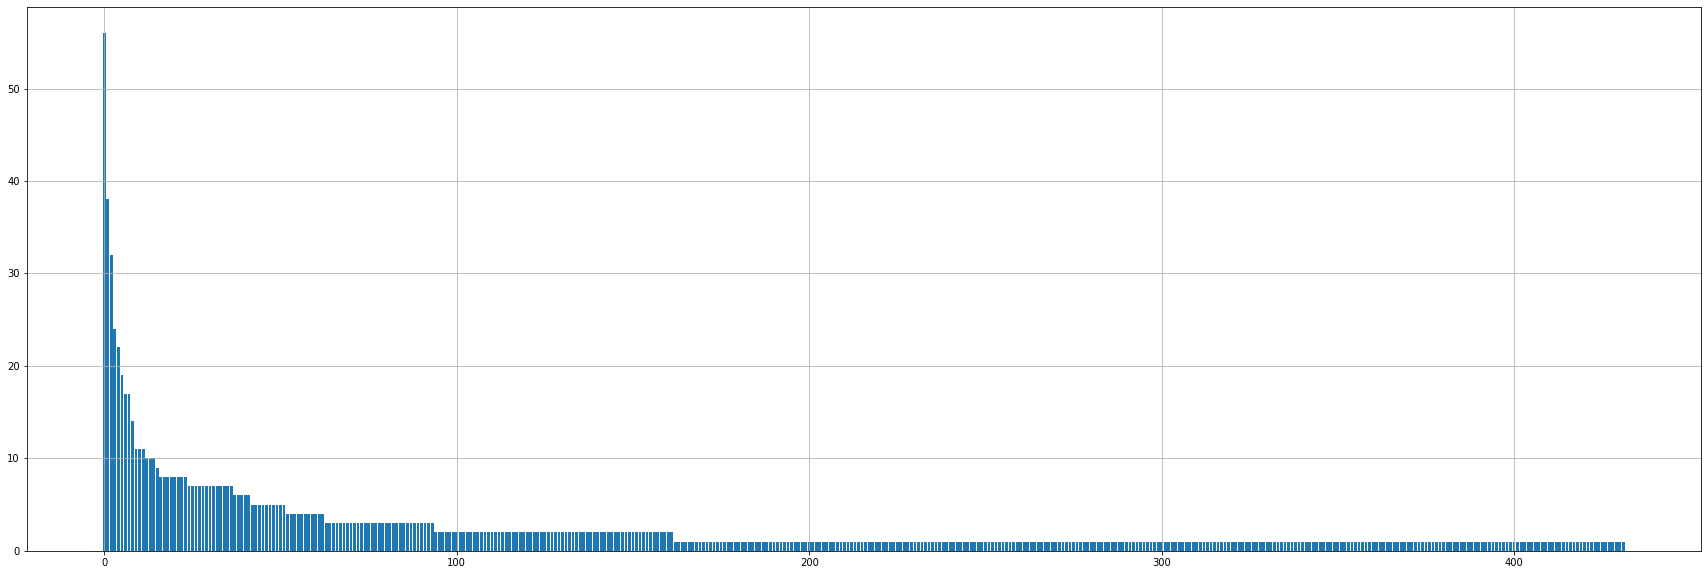

In [ ]:
from matplotlib import pyplot as plt

x = ordered_list_of_words_lemmatized.copy()
y = [frequency_dictionary_lemmatized[word] for word in x]

x1 = [i for i in range(len(y))]

plt.figure(figsize = (30,10))
plt.grid(True)
plt.bar(x1,y)

Этот график замечательно иллюстрирует так называемый закон Ципфа:

**Зако́н Ци́пфа («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n.**

# Задача

Как мы уже говорили, в этом семестре вам нужно будет выполнить некоторый проект, связанный с анализом данных.
Одной из основных задач, с которой мы часто сталкиваемся при этом, является задача заполнения пропущенных значений.
Существует множество способов это сделать. И один из способов основан на частотном анализе.
Как правило, этот метод применяется к категориальным признакам(колонкам). Категориальный признак - это признак, значения которого берутся из фиксированного набора значений (пол, цвет, гражданство и т.д.)

В случае наличия пропущенных категориальных значений можно заполнять пропуски самым частым значением в соответствующей колонке.

В качестве примера давайте рассмотрим набор данных про пассажиров Титаника (вы уже видели его в описании домашнего задания).
В нём есть колонка Pclass - класс, в котором путешествовал пассажир. Это - категориальный признак. Какие-то значения в ней пропущены.
Наша цель - заполнить эти значения и сохранить получившийся файл.

In [ ]:
!wget -O "titanic.csv" "https://drive.google.com/uc?id=1J_CSCzJiplH00IiALQAOEv5yOHSduhGB&export=download"

--2021-11-10 15:25:02--  https://drive.google.com/uc?id=1J_CSCzJiplH00IiALQAOEv5yOHSduhGB&export=download
Resolving drive.google.com (drive.google.com)... 74.125.141.101, 74.125.141.100, 74.125.141.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qdter9a0o2v99gp6qp4sfljc2jil13ol/1636557900000/05476118052512889131/*/1J_CSCzJiplH00IiALQAOEv5yOHSduhGB?e=download [following]
--2021-11-10 15:25:02--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qdter9a0o2v99gp6qp4sfljc2jil13ol/1636557900000/05476118052512889131/*/1J_CSCzJiplH00IiALQAOEv5yOHSduhGB?e=download
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-00-1g-docs.googleusercontent.com (doc-00

## Решение

1. Считываем файл.
2. Видим, что значения пропущены.
3. Получаем список всех возможных значений колонки Pclass.
4. Ищем самое частое значение - это скорее всего 3.
5. Переписываем файл, заполняя пропущенные значения самым частым элементом.

In [ ]:
from collections import Counter

with open('titanic.csv') as in_file:
    lines = in_file.readlines()
    lst = [line.replace('\n', '').split(',') for line in lines]

    data_lst = lst[1:] # Пропускаем первую строку
    pclasses = [elem[1] for elem in data_lst]

    # Выбираем только непустые значения
    pclasses_filter = filter(lambda x: x!='', pclasses)
    print(pclasses_filter)
    
    # Выбираем самое частое значение
    how_much_pclasses = Counter(pclass for pclass in pclasses_filter)
    most_frequent_pclass = how_much_pclasses.most_common()[0][0]
    print(most_frequent_pclass)

    # Записываем результат, заменяя пропуски
    with open('titanic_res.csv', 'w') as out_file:
        for line in lst:
            if line[1]=='':
                line[1] = most_frequent_pclass
            out_file.write(','.join(line) + '\n')

3


# **Метод модуля itertools groupby**

In [ ]:
from itertools import groupby

На вход методу мы подаем итерируемую последовательность и некоторую функцию `keyfunc`, определяющую группировку объектов (то есть их похожесть)

Метод `groupby` возвращает нам итерируемый объект, в котором данные сгруппированы по группам, выделенным при помощи `keyfunc`

Пример: разделим четные и нечетные числа.

In [ ]:
keyfunc = lambda x: 'нечетные' if int(x%2) else 'четные'
sequence = [i for i in range(10)]

sequence = sorted(sequence, key=keyfunc)
print(sequence)

for group, nums in groupby(sequence, keyfunc):
  print(group, list(nums))

[1, 3, 5, 7, 9, 0, 2, 4, 6, 8]
нечетные [1, 3, 5, 7, 9]
четные [0, 2, 4, 6, 8]


Или в целом равные по модулю n (равенство чисел а и b по модулю n означает, что при делении на n a и b дают одинаковые остатки. Например, все нечетные числа равны по модулю 2, числа 6 и 11 равны по модулю 5, так как оба дают остаток 1, и так далее)

In [ ]:
N = 4

keyfunc = lambda x: int(x%N) 
sequence = [i for i in range(16)]

sequence = sorted(sequence, key=keyfunc)
print(sequence)

for group, nums in groupby(sequence, keyfunc):
  print('остаток от деления на ', N, ': ', group, ' -> ', list(nums))

[0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15]
остаток от деления на  4 :  0  ->  [0, 4, 8, 12]
остаток от деления на  4 :  1  ->  [1, 5, 9, 13]
остаток от деления на  4 :  2  ->  [2, 6, 10, 14]
остаток от деления на  4 :  3  ->  [3, 7, 11, 15]


Или пусть мы имеем таблицу, в которой храним информацию о статусе населенных пунктов, которые мы хотим сгруппировать.

In [ ]:
table = [['Париж', 'город', 'Франция'],
         ['Абкот', 'деревня', 'Англия'],
         ['Алексеевка', 'поселок городского типа', 'Россия'],
         ['Мехико', 'город', 'Мексика'],
         ['Финистер', 'деревня', 'Франция'],
         ['Москва', 'город', 'Россия'],
         ['Бешенковичи', 'поселок городского типа', 'Белоруссия']]

table

[['Париж', 'город', 'Франция'],
 ['Абкот', 'деревня', 'Англия'],
 ['Алексеевка', 'поселок городского типа', 'Россия'],
 ['Мехико', 'город', 'Мексика'],
 ['Финистер', 'деревня', 'Франция'],
 ['Москва', 'город', 'Россия'],
 ['Бешенковичи', 'поселок городского типа', 'Белоруссия']]

In [ ]:
keyfunc = lambda x:x[1]

table = sorted(table,key = keyfunc)

for TYPE, group in groupby(table, keyfunc):
  print(TYPE)
  print('------------------')
  for g in group:
    print(g[0],',',g[2])
  print('------------------')
  print('\n')

город
------------------
Париж , Франция
Мехико , Мексика
Москва , Россия
------------------


деревня
------------------
Абкот , Англия
Финистер , Франция
------------------


поселок городского типа
------------------
Алексеевка , Россия
Бешенковичи , Белоруссия
------------------




#Задача

Дана таблица пищевой ценности разных продуктов. Нужно отсортировать их по калорийности в три группы: диетические, средней калорийности и повышенной калорийности, используя функцию **groupby**.

Считаем, что 1г белка содержит 4 ккал, 1г жиров содержит 9 ккал, 1г углеводов также содержит 4 ккал.

Категорию продукта определяем следующим образом: 
Если продукт входит в 25% наиболее калорийных продуктов, то считаем его калорийным. Если в 25% наименее калорийных - диетическим. Иначе - считаем его продуктом средней калорийности.



## Решение

In [ ]:
!wget -O "Calories.csv" "https://drive.google.com/uc?id=146xskPunSOczZ62qtL_-3giBSL9Fd996&export=download"

--2021-11-09 19:23:13--  https://drive.google.com/uc?id=146xskPunSOczZ62qtL_-3giBSL9Fd996&export=download
Resolving drive.google.com (drive.google.com)... 173.194.216.100, 173.194.216.101, 173.194.216.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mh26550idpfhle01qc0b41b4jab3dvfi/1636485750000/05476118052512889131/*/146xskPunSOczZ62qtL_-3giBSL9Fd996?e=download [following]
--2021-11-09 19:23:14--  https://doc-04-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mh26550idpfhle01qc0b41b4jab3dvfi/1636485750000/05476118052512889131/*/146xskPunSOczZ62qtL_-3giBSL9Fd996?e=download
Resolving doc-04-1g-docs.googleusercontent.com (doc-04-1g-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-04-1g-docs.googleusercontent.com (d

Создадим функцию, позволяющую нам вычислить калорийность продукта, а также двумерный массив вида


[
(...     ,  ... , ... ,   ...   ,   ...  )

**(продукт , белки, жиры, углеводы, калории)**

(...     ,  ... , ... ,   ...   ,   ...  )
]


In [ ]:
table = []
with open('Calories.csv', 'r') as file:
  for line in file:
    table.append(line.strip().split(','))
  
table

[['Продукт', 'Белки', 'Жиры', 'Углеводы'],
 ['Брынза из коровьего молока', '17.9', '20.1', '0.0'],
 ['Йогурт нат. 1.5% жирности', '5.0', '1.5', '3.5'],
 ['Кефир нежирный', '3.0', '0.1', '3.8'],
 ['Кефир жирный', '2.8', '3.2', '4.1'],
 ['Молоко', '2.8', '3.2', '4.7'],
 ['Молоко ацидофильное', '2.8', '3.2', '10.8'],
 ['Молоко сухое цельное', '25.6', '25.0', '39.4'],
 ['Молоко сгущеное', '7.0', '7.9', '9.5'],
 ['Молоко сгущеное с сахаром', '7.2', '8.5', '56.0'],
 ['Простокваша', '2.8', '3.2', '4.1'],
 ['Ряженка', '3.0', '6.0', '4.1'],
 ['Сливки 10%', '3.0', '10.0', '4.0'],
 ['Сливки 20%', '2.8', '20.0', '3.6'],
 ['Сметана 10%', '3.0', '10.0', '2.9'],
 ['Сметана 20%', '2.8', '20.0', '3.2'],
 ['Сырки и масса творожные особые', '7.1', '23.0', '27.5'],
 ['Сыр российский', '23.4', '30.0', '0.0'],
 ['Сыр голландский', '26.8', '27.3', '0.0'],
 ['Сыр швейцарский', '24.9', '31.8', '0.0'],
 ['Сыр пошехонский', '26.0', '26.5', '0.0'],
 ['Сыр плавленный', '24.0', '13.5', '0.0'],
 ['Творог жирный', '1

In [ ]:
table.pop(0)

['Продукт', 'Белки', 'Жиры', 'Углеводы']

In [ ]:
table

[['Брынза из коровьего молока', '17.9', '20.1', '0.0'],
 ['Йогурт нат. 1.5% жирности', '5.0', '1.5', '3.5'],
 ['Кефир нежирный', '3.0', '0.1', '3.8'],
 ['Кефир жирный', '2.8', '3.2', '4.1'],
 ['Молоко', '2.8', '3.2', '4.7'],
 ['Молоко ацидофильное', '2.8', '3.2', '10.8'],
 ['Молоко сухое цельное', '25.6', '25.0', '39.4'],
 ['Молоко сгущеное', '7.0', '7.9', '9.5'],
 ['Молоко сгущеное с сахаром', '7.2', '8.5', '56.0'],
 ['Простокваша', '2.8', '3.2', '4.1'],
 ['Ряженка', '3.0', '6.0', '4.1'],
 ['Сливки 10%', '3.0', '10.0', '4.0'],
 ['Сливки 20%', '2.8', '20.0', '3.6'],
 ['Сметана 10%', '3.0', '10.0', '2.9'],
 ['Сметана 20%', '2.8', '20.0', '3.2'],
 ['Сырки и масса творожные особые', '7.1', '23.0', '27.5'],
 ['Сыр российский', '23.4', '30.0', '0.0'],
 ['Сыр голландский', '26.8', '27.3', '0.0'],
 ['Сыр швейцарский', '24.9', '31.8', '0.0'],
 ['Сыр пошехонский', '26.0', '26.5', '0.0'],
 ['Сыр плавленный', '24.0', '13.5', '0.0'],
 ['Творог жирный', '14.0', '18.0', '1.3'],
 ['Творог полужирный'

In [ ]:
calories = lambda x,y,z: 4*x + 9*y + 4*x
for item in table:
  item.append(calories(float(item[1]), float(item[2]), float(item[2])))

table

[['Брынза из коровьего молока', '17.9', '20.1', '0.0', 324.1],
 ['Йогурт нат. 1.5% жирности', '5.0', '1.5', '3.5', 53.5],
 ['Кефир нежирный', '3.0', '0.1', '3.8', 24.9],
 ['Кефир жирный', '2.8', '3.2', '4.1', 51.2],
 ['Молоко', '2.8', '3.2', '4.7', 51.2],
 ['Молоко ацидофильное', '2.8', '3.2', '10.8', 51.2],
 ['Молоко сухое цельное', '25.6', '25.0', '39.4', 429.79999999999995],
 ['Молоко сгущеное', '7.0', '7.9', '9.5', 127.10000000000001],
 ['Молоко сгущеное с сахаром', '7.2', '8.5', '56.0', 134.1],
 ['Простокваша', '2.8', '3.2', '4.1', 51.2],
 ['Ряженка', '3.0', '6.0', '4.1', 78.0],
 ['Сливки 10%', '3.0', '10.0', '4.0', 114.0],
 ['Сливки 20%', '2.8', '20.0', '3.6', 202.39999999999998],
 ['Сметана 10%', '3.0', '10.0', '2.9', 114.0],
 ['Сметана 20%', '2.8', '20.0', '3.2', 202.39999999999998],
 ['Сырки и масса творожные особые', '7.1', '23.0', '27.5', 263.8],
 ['Сыр российский', '23.4', '30.0', '0.0', 457.20000000000005],
 ['Сыр голландский', '26.8', '27.3', '0.0', 460.1],
 ['Сыр швейцар

Отсортируем наши продукты согласно их калорийности

In [ ]:
sortfunk = lambda x: x[-1]

sorted_table = sorted(table, key = sortfunk)
sorted_table

[['Баклажаны', '0.6', '0.1', '5.5', 5.699999999999999],
 ['Кабачки', '0.6', '0.3', '5.7', 7.5],
 ['Брюква', '1.2', '0.1', '8.1', 10.5],
 ['Сыроежи свежие', '1.7', '0.3', '1.4', 16.3],
 ['Кефир нежирный', '3.0', '0.1', '3.8', 24.9],
 ['Подберезовики свежие', '2.3', '0.9', '3.7', 26.499999999999996],
 ['Подосиновики свежие', '3.3', '0.5', '3.4', 30.9],
 ['Белые свежие', '3.2', '0.7', '1.6', 31.900000000000002],
 ['Горошек зеленый', '5.0', '0.2', '13.3', 41.8],
 ['Хлеб ржаной', '4.7', '0.7', '49.8', 43.900000000000006],
 ['Бобы', '6.0', '0.1', '8.3', 48.9],
 ['Кефир жирный', '2.8', '3.2', '4.1', 51.2],
 ['Молоко', '2.8', '3.2', '4.7', 51.2],
 ['Молоко ацидофильное', '2.8', '3.2', '10.8', 51.2],
 ['Простокваша', '2.8', '3.2', '4.1', 51.2],
 ['Йогурт нат. 1.5% жирности', '5.0', '1.5', '3.5', 53.5],
 ['Рисовая', '7.0', '0.6', '73.7', 61.4],
 ['Мука ржаная', '6.9', '1.1', '76.9', 65.1],
 ['Кукурузная', '8.3', '1.2', '75.0', 77.2],
 ['Ряженка', '3.0', '6.0', '4.1', 78.0],
 ['Хлеб пшен. из муки

Определим границы калорийности, согласно которым будем проводить классификацию.

In [ ]:
bound1 = int(0.25*len(sorted_table))
bound2 = int(0.75*len(sorted_table))

max_calories1 = sorted_table[bound1][-1]
max_calories2 = sorted_table[bound2][-1]

print(
f'''
Продукты с калорийностью менее {max_calories1} считаем диестическими, 
от {max_calories1} до {max_calories2} - средней калорийности, 
а более {max_calories2} - высококалорийными
'''
)


Продукты с калорийностью менее 93.1 считаем диестическими, 
от 93.1 до 274.0 - средней калорийности, 
а более 274.0 - высококалорийными



Зададим функцию keyfunc, по которой будем группировать наши продукты и проведем соответствующую группировку.

In [ ]:
from itertools import groupby

keyfunc_1 = lambda x: 'среднекалорийный' if x[-1] < max_calories2 else 'высококалорийный'
keyfunc = lambda x: 'диетический' if x[-1] < max_calories1 else keyfunc_1(x)

grouped_meals = groupby(sorted_table, key = keyfunc)

In [ ]:
for group, meal_info in grouped_meals:
    print('---------------')
    for meal in meal_info:
        print(f'Продукт {meal[0]} - {group}, так как его калорийность {meal[-1]}')
    
    print('---------------')

---------------
Продукт Баклажаны - диетический, так как его калорийность 5.699999999999999
Продукт Кабачки - диетический, так как его калорийность 7.5
Продукт Брюква - диетический, так как его калорийность 10.5
Продукт Сыроежи свежие - диетический, так как его калорийность 16.3
Продукт Кефир нежирный - диетический, так как его калорийность 24.9
Продукт Подберезовики свежие - диетический, так как его калорийность 26.499999999999996
Продукт Подосиновики свежие - диетический, так как его калорийность 30.9
Продукт Белые свежие - диетический, так как его калорийность 31.900000000000002
Продукт Горошек зеленый - диетический, так как его калорийность 41.8
Продукт Хлеб ржаной - диетический, так как его калорийность 43.900000000000006
Продукт Бобы - диетический, так как его калорийность 48.9
Продукт Кефир жирный - диетический, так как его калорийность 51.2
Продукт Молоко - диетический, так как его калорийность 51.2
Продукт Молоко ацидофильное - диетический, так как его калорийность 51.2
Продук